# CNN for fNIRS data analysis for Human Activity Recognition (HAR)

In [1]:
% ls ../../../datasets/fNIRs_data_10subjects/

all-fNIRs-data.zip  P13-4-17-2018/  P16-4-18-2018/  P19-4-19-2018/
P11-4-17-2018/      P14-4-18-2018/  P17-4-18-2018/  P20-4-19-2018/
P12-4-17-2018/      P15-4-18-2018/  P18-4-19-2018/


In [2]:
% ls ../../../datasets/fNIRs_data_10subjects/P12-4-17-2018/

1. Right Hand/  2. Both Hands/  3. Left Hand/  4. Right Leg/  5. Left Leg/


In [3]:
% ls ../../../datasets/fNIRs_data_10subjects/P12-4-17-2018/1.\ Right\ Hand

2018-04-17_006/
fNIR_data.txt
head20180417-145130.txt
NIRS-2018-04-17_006_deoxyhb_T141to2511_C1to20.txt
NIRS-2018-04-17_006_oxyhb_T141to2511_C1to20.txt
Processed/
r_hand20180417-145128.txt
r_lower_arm20180417-145129.txt
r_upper_arm20180417-145129.txt


In [4]:
import numpy as np
import os
import pandas as pd

# % find ../../datasets/fNIRs_data/ | grep fNIR_data # NOT WORKING!!
def find_all(name, path):
    result = []
    for root, dirs, files in os.walk(path):
        if name in files:
            result.append(os.path.join(root, name))
    return result

allpaths = find_all(name='fNIR_data.txt', path='/home/arasdar/datasets/fNIRs_data_10subjects/')
allpaths = sorted(allpaths, reverse=False)
# print(allpaths, len(allpaths))
allpaths, len(allpaths)

(['/home/arasdar/datasets/fNIRs_data_10subjects/P11-4-17-2018/1. Right Hand/fNIR_data.txt',
  '/home/arasdar/datasets/fNIRs_data_10subjects/P11-4-17-2018/2. Both Hands/fNIR_data.txt',
  '/home/arasdar/datasets/fNIRs_data_10subjects/P11-4-17-2018/3. Left hand/fNIR_data.txt',
  '/home/arasdar/datasets/fNIRs_data_10subjects/P11-4-17-2018/5. Left Leg/fNIR_data.txt',
  '/home/arasdar/datasets/fNIRs_data_10subjects/P12-4-17-2018/1. Right Hand/fNIR_data.txt',
  '/home/arasdar/datasets/fNIRs_data_10subjects/P12-4-17-2018/2. Both Hands/fNIR_data.txt',
  '/home/arasdar/datasets/fNIRs_data_10subjects/P12-4-17-2018/3. Left Hand/fNIR_data.txt',
  '/home/arasdar/datasets/fNIRs_data_10subjects/P12-4-17-2018/4. Right Leg/fNIR_data.txt',
  '/home/arasdar/datasets/fNIRs_data_10subjects/P12-4-17-2018/5. Left Leg/fNIR_data.txt',
  '/home/arasdar/datasets/fNIRs_data_10subjects/P13-4-17-2018/1. Right Hand/fNIR_data.txt',
  '/home/arasdar/datasets/fNIRs_data_10subjects/P13-4-17-2018/2. Both Hands/fNIR_data.t

In [5]:
# labelstest=[]
# for each in range(len(allpaths)):
#     labeltest = allpaths[each][59:60]
# #     print(labeltest)
#     labelstest.append(labeltest)
# # allpaths[each][59:60] - new
# # allpaths[each][48:49] - old
# len(labelstest)

In [6]:
# len(labelstest)
# np.array(labelstest, dtype=int)

In [7]:
# df: data frame object
df = []
for each_idx in range(len(allpaths)):
    file = pd.read_csv(filepath_or_buffer=allpaths[each_idx], names=['time', 'sample', 
                       'channel', 'channel', 'channel', 'channel', 'channel',
                       'channel', 'channel', 'channel', 'channel', 'channel',
                       'channel', 'channel', 'channel', 'channel', 'channel',
                       'channel', 'channel', 'channel', 'channel', 'channel',
                       'channel', 'channel', 'channel', 'channel', 'channel',
                       'channel', 'channel', 'channel', 'channel', 'channel',
                       'channel', 'channel', 'channel', 'channel', 'channel',
                       'channel', 'channel', 'channel', 'channel', 'channel'],
                         header=None)
    df.append(file)
    
for each in range(len(df)):
    print(df[each].shape, allpaths[each])
    df[each]=df[each].drop(axis=1, columns=None, index=None, labels=['time', 'sample'])
    df[each] = df[each].dropna()
    df[each]['channel.39'] = df[each]['channel.39'].astype(str).str[1:-1].astype(float)
print(len(df))

/home/arasdar/anaconda3/envs/arasdar-DL-env/lib/python3.6/site-packages/pandas/io/parsers.py:709: UserWarning: Duplicate names specified. This will raise an error in the future.
  return _read(filepath_or_buffer, kwds)


(2388, 42) /home/arasdar/datasets/fNIRs_data_10subjects/P11-4-17-2018/1. Right Hand/fNIR_data.txt
(1244, 42) /home/arasdar/datasets/fNIRs_data_10subjects/P11-4-17-2018/2. Both Hands/fNIR_data.txt
(2389, 42) /home/arasdar/datasets/fNIRs_data_10subjects/P11-4-17-2018/3. Left hand/fNIR_data.txt
(1201, 42) /home/arasdar/datasets/fNIRs_data_10subjects/P11-4-17-2018/5. Left Leg/fNIR_data.txt
(2372, 42) /home/arasdar/datasets/fNIRs_data_10subjects/P12-4-17-2018/1. Right Hand/fNIR_data.txt
(1210, 42) /home/arasdar/datasets/fNIRs_data_10subjects/P12-4-17-2018/2. Both Hands/fNIR_data.txt
(2378, 42) /home/arasdar/datasets/fNIRs_data_10subjects/P12-4-17-2018/3. Left Hand/fNIR_data.txt
(1202, 42) /home/arasdar/datasets/fNIRs_data_10subjects/P12-4-17-2018/4. Right Leg/fNIR_data.txt
(1222, 42) /home/arasdar/datasets/fNIRs_data_10subjects/P12-4-17-2018/5. Left Leg/fNIR_data.txt
(2405, 42) /home/arasdar/datasets/fNIRs_data_10subjects/P13-4-17-2018/1. Right Hand/fNIR_data.txt
(1196, 42) /home/arasdar/da

In [8]:
data, labels = [], []
for each in range(0, len(df), 1):
    dfmat = df[each].as_matrix()
    label = allpaths[each][59:60]
    print(dfmat.dtype, dfmat.shape, label, allpaths[each])
    data.append(dfmat)
    labels.append(label)
len(data), len(labels)

float64 (2387, 40) 1 /home/arasdar/datasets/fNIRs_data_10subjects/P11-4-17-2018/1. Right Hand/fNIR_data.txt
float64 (1243, 40) 2 /home/arasdar/datasets/fNIRs_data_10subjects/P11-4-17-2018/2. Both Hands/fNIR_data.txt
float64 (2388, 40) 3 /home/arasdar/datasets/fNIRs_data_10subjects/P11-4-17-2018/3. Left hand/fNIR_data.txt
float64 (1200, 40) 5 /home/arasdar/datasets/fNIRs_data_10subjects/P11-4-17-2018/5. Left Leg/fNIR_data.txt
float64 (2371, 40) 1 /home/arasdar/datasets/fNIRs_data_10subjects/P12-4-17-2018/1. Right Hand/fNIR_data.txt
float64 (1209, 40) 2 /home/arasdar/datasets/fNIRs_data_10subjects/P12-4-17-2018/2. Both Hands/fNIR_data.txt
float64 (2377, 40) 3 /home/arasdar/datasets/fNIRs_data_10subjects/P12-4-17-2018/3. Left Hand/fNIR_data.txt
float64 (1201, 40) 4 /home/arasdar/datasets/fNIRs_data_10subjects/P12-4-17-2018/4. Right Leg/fNIR_data.txt
float64 (1221, 40) 5 /home/arasdar/datasets/fNIRs_data_10subjects/P12-4-17-2018/5. Left Leg/fNIR_data.txt
float64 (2404, 40) 1 /home/arasdar/

(48, 48)

In [10]:
# This is very much like a convolution for extracting the windows
# size/width, stride/overlap, padding, dilation, num filters/out channel
def minibatching(X, Y, stride, width):
    Xmb, Ymb = [], []
    print(len(X), len(Y))
    # 1st and 1st
    for eachX in range(len(X)):
        num_mb = ((X[eachX].shape[0]-width)//stride)+1
        for each in range(num_mb):
            # The max is (num_mb-1)*stride+width==X[idx].shape[0]
            # The last each is (num_mb-1)
            # each = ((each-1)*stride)+width
            each *= stride
            Xmb.append(X[eachX][each:each+width])
            # There is only one label for one image signal or signal window or temporal window
            #Ymb.append(Y[eachX][each:each+1])
            Ymb.append(Y[eachX])
    return Xmb, Ymb

In [11]:
# Width is based on the sampling rate which is roughly about 233 points per window
# for 10sec rest and 20 sec activity
width = 250
Xmb, Ymb = minibatching(X=data, Y=labels, stride=1, width=width)
# for eachX, eachY in zip(Xmb, Ymb):
#     print(eachX.shape, eachY)
print(len(Xmb), len(Ymb))
print(Xmb[0].shape, Xmb[0].dtype)
print(Ymb[0])

48 48
69615 69615
(250, 40) float64
1


In [12]:
# Conversion from python list to numpy array
X, Y=np.array(object=Xmb, dtype=float), np.array(object=Ymb, dtype=int)
print(X.shape, X.dtype, Y.shape, Y.dtype)

(69615, 250, 40) float64 (69615,) int64


In [13]:
# Now I should devide the data into train and test
# Train and valid split
from sklearn.model_selection import train_test_split

# 30% of the training data/ entire training data is assigned to validation.
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.30)
print(Xtrain.shape, Xtest.shape, Ytrain.shape, Ytest.shape)
print(Xtrain.dtype, Xtest.dtype, Ytrain.dtype, Ytest.dtype)

(48730, 250, 40) (20885, 250, 40) (48730,) (20885,)
float64 float64 int64 int64


In [14]:
# # standardizing/normalizing the train and test data
# def standardize(train, test):
# """ Standardize data """
# # Standardize train and test
# X_train = (train - np.mean(train, axis=0)[None,:,:]) / np.std(train, axis=0)[None,:,:]
# X_test = (test - np.mean(test, axis=0)[None,:,:]) / np.std(test, axis=0)[None,:,:]
# return X_train, X_test

Xtrain = (Xtrain - Xtrain.mean(axis=0))/ Xtrain.std(axis=0)
Xtest = (Xtest - Xtest.mean(axis=0))/ Xtest.std(axis=0)
print(Xtrain.shape, Xtrain.dtype)
print(Xtest.shape, Xtest.dtype)

(48730, 250, 40) float64
(20885, 250, 40) float64


In [15]:
print(Xtrain.mean(axis=0), Xtrain.std(axis=0))

[[-3.80114117e-17 -4.49055937e-17 -1.72924128e-18 ...  3.54653944e-17
  -1.22899160e-16 -3.32041666e-17]
 [-2.98641564e-17 -6.66543912e-17  1.92529031e-17 ... -4.45339435e-17
  -7.08966142e-17  8.45482792e-18]
 [ 7.58633414e-17 -3.58606821e-18  5.43959159e-17 ...  2.25689909e-17
  -8.78131049e-17 -1.04139512e-16]
 ...
 [ 1.16080162e-16 -5.02596346e-18 -1.99261452e-17 ...  2.00591419e-17
   1.62979282e-16  3.30560761e-17]
 [ 8.38830111e-17 -5.47843687e-17 -9.92661957e-18 ...  2.89061248e-17
  -8.99023200e-18 -8.52887316e-17]
 [ 3.12448154e-17 -2.73899060e-17 -3.89250162e-17 ...  4.84379791e-17
   1.73359286e-16 -7.25415578e-17]] [[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]


In [16]:
print(Xtest.mean(axis=0), Xtest.std(axis=0))

[[-5.37436188e-18  3.39901145e-17  3.11723621e-17 ...  2.44956078e-17
   2.00578388e-17 -5.38180412e-17]
 [ 7.12860463e-18  5.09194707e-17 -3.35538795e-17 ... -9.09016697e-17
   5.93841072e-17 -2.16516082e-17]
 [ 9.25123835e-17 -9.39676076e-17 -3.50848550e-18 ... -2.14761840e-18
  -8.23500686e-17  5.11175705e-17]
 ...
 [-6.89098447e-17 -5.68893780e-17 -2.56438395e-17 ...  4.63545357e-18
  -4.67950898e-17 -1.19713778e-17]
 [-4.68542291e-17 -5.47210775e-17  3.71048921e-17 ... -2.85994727e-17
   1.80009228e-18 -4.87147896e-17]
 [-1.47622185e-17 -2.47461190e-17  4.53764124e-17 ... -5.74541080e-17
  -2.15592447e-17 -7.02760277e-17]] [[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]


In [17]:
# Onehotencoding of the output labels
def onehot(labels, n_class):
	""" One-hot encoding """
	expansion = np.eye(n_class)
	y = expansion[:, labels-1].T
	assert y.shape[1] == n_class, "Wrong number of labels!"

	return y

print(Y.max(axis=0), Ytrain.max(axis=0), Ytest.max(axis=0))
# # assert Y.max(axis=0) == Ytrain.max(axis=0) == Ytest.max(axis=0), 'wrong labels'
Ytrain=onehot(labels=Ytrain, n_class=Ytrain.max(axis=0))
Ytest=onehot(labels=Ytest, n_class=Ytest.max(axis=0))
print(Ytrain.shape, Ytrain.dtype, Ytest.shape, Ytest.dtype)

5 5 5
(48730, 5) float64 (20885, 5) float64


In [18]:
# Now separating train and validation set
# 30% of the training data/ entire training data is assigned to validation.
Xtrain, Xvalid, Ytrain, Yvalid = train_test_split(Xtrain, Ytrain, test_size=0.30)
print(Xtrain.shape, Xvalid.shape, Xtest.shape, Xtrain.dtype, Xvalid.dtype, Xtest.dtype)
print(Ytrain.shape, Yvalid.shape, Ytest.shape, Ytrain.dtype, Yvalid.dtype, Ytest.dtype)

(34111, 250, 40) (14619, 250, 40) (20885, 250, 40) float64 float64 float64
(34111, 5) (14619, 5) (20885, 5) float64 float64 float64


In [19]:
# In this one we should define and detect GPUs for tensorflow
# GPUs or CPU
import tensorflow as tf

# Check TensorFlow Version
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.7.0
Default GPU Device: /device:GPU:0


In [20]:
# now I can design the actual input and output tensors
N, W, Cin = Xvalid.shape[0], Xvalid.shape[1], Xvalid.shape[2]
X = tf.placeholder(dtype=tf.float32, name=None, shape=[N, W, Cin])
print(X.shape, X.dtype, Xtrain.shape, Xtrain.dtype, Xvalid.shape, Xvalid.dtype, Xtest.shape, Xtest.dtype)

(14619, 250, 40) <dtype: 'float32'> (34111, 250, 40) float64 (14619, 250, 40) float64 (20885, 250, 40) float64


In [21]:
# This is the output tensor for labels
N, Cout = Yvalid.shape[0], Yvalid.shape[1]
Y = tf.placeholder(dtype=tf.float32, name=None, shape=[N, Cout])
print(Y.shape, Y.dtype, Ytrain.shape, Ytrain.dtype, Yvalid.shape, Yvalid.dtype, Ytest.shape, Ytest.dtype)

(14619, 5) <dtype: 'float32'> (34111, 5) float64 (14619, 5) float64 (20885, 5) float64


In [22]:
print(X.shape, X.dtype)
Wwidth, Wchannels, Wnumber = X.shape[1].value//2, X.shape[2].value, X.shape[2].value*2
shape = [Wwidth, Wchannels, Wnumber]
initial_value=tf.random_normal(dtype=X.dtype, mean=0.0, name=None, shape=shape, stddev=1.0)
Wconv = tf.Variable(dtype=X.dtype, initial_value=initial_value, name=None, trainable=True)
print(Wconv.shape, Wconv.dtype)
Xconv = tf.nn.conv1d(data_format='NWC', filters=Wconv, name=None, padding='SAME', stride=2, use_cudnn_on_gpu=True, 
                     value=X)
Xconv = tf.maximum(name=None, x=(-0.1*Xconv), y=Xconv)
print(Xconv.shape, Xconv.dtype)

(14619, 250, 40) <dtype: 'float32'>
(125, 40, 80) <dtype: 'float32_ref'>
(14619, 125, 80) <dtype: 'float32'>


In [23]:
# This is the multiplication layer
# this part is flatening the input
shape = [Xconv.shape[0].value, Xconv.shape[1].value*Xconv.shape[2].value]
Xconv_reshaped = tf.reshape(name=None, shape=shape, tensor=Xconv)
print(Xconv_reshaped.shape, Xconv_reshaped.dtype)
# their first axis or dimension stay the same
shape = [Xconv_reshaped.shape[1].value, Y.shape[1].value]
initial_value = tf.random_normal(dtype=Xconv_reshaped.dtype, mean=0.0, name=None, shape=shape, stddev=1.0)
W = tf.Variable(dtype=Xconv_reshaped.dtype, initial_value=initial_value, name=None, trainable=True)
print(W.shape, W.dtype)
# The actual multiplication
# Y_ = Xconv_reshaped @ W
Y_ = tf.matmul(a=Xconv_reshaped, b=W, name=None)
print(Y_.shape, Y_.dtype)
print(Y.shape, Y.dtype)

(14619, 10000) <dtype: 'float32'>
(10000, 5) <dtype: 'float32_ref'>
(14619, 5) <dtype: 'float32'>
(14619, 5) <dtype: 'float32'>


In [24]:
# Now I need to calculate the loss
loss_tensor = tf.nn.softmax_cross_entropy_with_logits_v2(labels=Y, logits=Y_, name=None)
print(loss_tensor.shape, loss_tensor.dtype)
loss = tf.reduce_mean(axis=0, input_tensor=loss_tensor, name=None)
print(loss)

(14619,) <dtype: 'float32'>
Tensor("Mean:0", shape=(), dtype=float32)


In [25]:
# Backprop and SGD now using adam
opt = tf.train.AdamOptimizer().minimize(loss)
print(opt)

name: "Adam"
op: "NoOp"
input: "^Adam/update_Variable/ApplyAdam"
input: "^Adam/update_Variable_1/ApplyAdam"
input: "^Adam/Assign"
input: "^Adam/Assign_1"



In [26]:
print(Y_.shape, Y_.dtype, Y.shape, Y.dtype)

(14619, 5) <dtype: 'float32'> (14619, 5) <dtype: 'float32'>


In [27]:
# Accuracy
# tf.argmax(
#     input,
#     axis=None,
#     name=None,
#     dimension=None,
#     output_type=tf.int64
# )
# Y_NxCout, N:axis 1, Cout: axis 2
Y_argmax = tf.argmax(axis=1, name=None, input=Y_)
print(Y_argmax.shape, Y_argmax.dtype)
Yargmax = tf.argmax(axis=1, name=None, input=Y)
print(Yargmax.shape, Yargmax.dtype)

acc_tensor = tf.equal(name=None, x=Y_argmax, y=Yargmax)
print(acc_tensor.shape, acc_tensor.dtype)
# cast bool to int datatype for equal
acc_tensor = tf.cast(dtype=tf.float32, name=None, x=acc_tensor)
print(acc_tensor.shape, acc_tensor.dtype)
acc = tf.reduce_mean(axis=0, input_tensor=acc_tensor)
print(acc.shape, acc.dtype)

(14619,) <dtype: 'int64'>
(14619,) <dtype: 'int64'>
(14619,) <dtype: 'bool'>
(14619,) <dtype: 'float32'>
() <dtype: 'float32'>


In [28]:
def get_batches(X, Y, batch_size):
    """ Return a generator for batches """
    n_batches = len(X) // batch_size
    X, Y = X[:n_batches*batch_size], Y[:n_batches*batch_size]

    # Loop over batches and yield
    for b in range(0, len(X), batch_size):
        yield X[b:b+batch_size], Y[b:b+batch_size]

In [29]:
# We should save the after training and validation
saver = tf.train.Saver() 
train_loss_mean, valid_loss_mean = [], []
train_acc_mean, valid_acc_mean = [], []

# now that we can calculate loss and optimize, we can start a session for calculating the error.
with tf.Session() as sess:
    sess.run(fetches=tf.global_variables_initializer())
    
    # for every epoch start feeding the arrays into the tensors in the model
    for epoch in range(0, 1000, 1):
        train_loss, valid_loss = [], []
        train_acc, valid_acc = [], []
        
        # Training minibatches and feed them into the tensor
        for Xarr, Yarr in get_batches(X=Xtrain, Y=Ytrain, batch_size=Xvalid.shape[0]):
            # X_NxWxCin, Y_NxCout
            feed_dict = {X:Xarr, Y:Yarr}
            lossarr, _, accarr = sess.run(feed_dict=feed_dict, fetches=[loss, opt, acc])
            train_loss.append(lossarr)
            train_acc.append(accarr)
            
        # Validation now which is one batch on every iteration
        for Xarr, Yarr in get_batches(X=Xvalid, Y=Yvalid, batch_size=Xvalid.shape[0]): 
            # X_NxWxCin, Y_NxCout
            feed_dict = {X:Xarr, Y:Yarr}
            lossarr, accarr = sess.run(feed_dict=feed_dict, fetches=[loss, acc])
            valid_loss.append(lossarr)
            valid_acc.append(accarr)
        
        # printing out train and validation loss
        print('epoch:', epoch+1, 'train_loss:', np.mean(train_loss), 'valid_loss:', np.mean(valid_loss),
             'train_acc:', np.mean(train_acc), 'valid_acc:', np.mean(valid_acc))
        
        # Every epoch, for drawing the plot and their learning curve
        train_loss_mean.append(np.mean(train_loss))
        valid_loss_mean.append(np.mean(valid_loss))
        train_acc_mean.append(np.mean(train_acc))
        valid_acc_mean.append(np.mean(valid_acc))
        
    # After all epochs and at the end of training and validation
    saver.save(sess,'checkpoints/cnn-fnirs-har-10subjects.ckpt')

epoch: 1 train_loss: 8973.712 valid_loss: 7603.7856 train_acc: 0.15195978 valid_acc: 0.14590602
epoch: 2 train_loss: 7148.1562 valid_loss: 6024.365 train_acc: 0.1539777 valid_acc: 0.15951844
epoch: 3 train_loss: 5609.0996 valid_loss: 4545.0615 train_acc: 0.15979205 valid_acc: 0.17080511
epoch: 4 train_loss: 4315.392 valid_loss: 3789.1 train_acc: 0.19768794 valid_acc: 0.22080854
epoch: 5 train_loss: 3640.5625 valid_loss: 3142.1077 train_acc: 0.21848279 valid_acc: 0.24488679
epoch: 6 train_loss: 2999.253 valid_loss: 2599.2795 train_acc: 0.24256104 valid_acc: 0.25911486
epoch: 7 train_loss: 2520.0962 valid_loss: 2203.8303 train_acc: 0.24290307 valid_acc: 0.22388673
epoch: 8 train_loss: 2160.6963 valid_loss: 1897.2081 train_acc: 0.22385252 valid_acc: 0.24741775
epoch: 9 train_loss: 1835.0354 valid_loss: 1529.2705 train_acc: 0.2453314 valid_acc: 0.24474998
epoch: 10 train_loss: 1468.6785 valid_loss: 1234.9923 train_acc: 0.24423695 valid_acc: 0.27019632
epoch: 11 train_loss: 1173.689 valid_l

epoch: 87 train_loss: 39.93012 valid_loss: 39.953682 train_acc: 0.8162323 valid_acc: 0.81373554
epoch: 88 train_loss: 39.434578 valid_loss: 39.4676 train_acc: 0.8183186 valid_acc: 0.8150352
epoch: 89 train_loss: 38.94523 valid_loss: 38.984043 train_acc: 0.81996036 valid_acc: 0.81708735
epoch: 90 train_loss: 38.465706 valid_loss: 38.517384 train_acc: 0.82122576 valid_acc: 0.8181818
epoch: 91 train_loss: 37.989277 valid_loss: 38.058887 train_acc: 0.82208085 valid_acc: 0.8196183
epoch: 92 train_loss: 37.51667 valid_loss: 37.601784 train_acc: 0.82324374 valid_acc: 0.8210548
epoch: 93 train_loss: 37.049774 valid_loss: 37.14978 train_acc: 0.824646 valid_acc: 0.8224913
epoch: 94 train_loss: 36.592407 valid_loss: 36.708702 train_acc: 0.82632196 valid_acc: 0.8233121
epoch: 95 train_loss: 36.14332 valid_loss: 36.278286 train_acc: 0.8279978 valid_acc: 0.8244066
epoch: 96 train_loss: 35.702393 valid_loss: 35.855026 train_acc: 0.82905805 valid_acc: 0.8260483
epoch: 97 train_loss: 35.267555 valid_lo

epoch: 172 train_loss: 16.74164 valid_loss: 17.515432 train_acc: 0.8990355 valid_acc: 0.89506805
epoch: 173 train_loss: 16.61024 valid_loss: 17.378805 train_acc: 0.8997537 valid_acc: 0.89541006
epoch: 174 train_loss: 16.477785 valid_loss: 17.237637 train_acc: 0.900472 valid_acc: 0.8961625
epoch: 175 train_loss: 16.345928 valid_loss: 17.102789 train_acc: 0.90125865 valid_acc: 0.8968466
epoch: 176 train_loss: 16.215668 valid_loss: 16.976633 train_acc: 0.90170324 valid_acc: 0.8971202
epoch: 177 train_loss: 16.08522 valid_loss: 16.85133 train_acc: 0.9021821 valid_acc: 0.8975306
epoch: 178 train_loss: 15.956564 valid_loss: 16.723953 train_acc: 0.9028661 valid_acc: 0.89828306
epoch: 179 train_loss: 15.830872 valid_loss: 16.594223 train_acc: 0.90344757 valid_acc: 0.8993775
epoch: 180 train_loss: 15.707208 valid_loss: 16.467093 train_acc: 0.90385795 valid_acc: 0.89978796
epoch: 181 train_loss: 15.584494 valid_loss: 16.3448 train_acc: 0.90440524 valid_acc: 0.9001984
epoch: 182 train_loss: 15.46

epoch: 256 train_loss: 9.826188 valid_loss: 10.643868 train_acc: 0.9345031 valid_acc: 0.92927015
epoch: 257 train_loss: 9.776253 valid_loss: 10.596412 train_acc: 0.9346398 valid_acc: 0.92961216
epoch: 258 train_loss: 9.72698 valid_loss: 10.551606 train_acc: 0.93494767 valid_acc: 0.92974895
epoch: 259 train_loss: 9.678305 valid_loss: 10.505577 train_acc: 0.9351187 valid_acc: 0.9300226
epoch: 260 train_loss: 9.629732 valid_loss: 10.45664 train_acc: 0.9352897 valid_acc: 0.93022776
epoch: 261 train_loss: 9.581352 valid_loss: 10.405905 train_acc: 0.9355633 valid_acc: 0.9303646
epoch: 262 train_loss: 9.533517 valid_loss: 10.355689 train_acc: 0.93573433 valid_acc: 0.930433
epoch: 263 train_loss: 9.486068 valid_loss: 10.308105 train_acc: 0.936008 valid_acc: 0.9307066
epoch: 264 train_loss: 9.439238 valid_loss: 10.263108 train_acc: 0.93658936 valid_acc: 0.93077505
epoch: 265 train_loss: 9.392773 valid_loss: 10.217245 train_acc: 0.9368288 valid_acc: 0.9309802
epoch: 266 train_loss: 9.34685 valid

epoch: 342 train_loss: 6.5992517 valid_loss: 7.442102 train_acc: 0.95290375 valid_acc: 0.94890213
epoch: 343 train_loss: 6.571256 valid_loss: 7.414611 train_acc: 0.95307475 valid_acc: 0.94910735
epoch: 344 train_loss: 6.543159 valid_loss: 7.3887715 train_acc: 0.953451 valid_acc: 0.9491757
epoch: 345 train_loss: 6.515029 valid_loss: 7.363085 train_acc: 0.9535878 valid_acc: 0.94931257
epoch: 346 train_loss: 6.486596 valid_loss: 7.337023 train_acc: 0.9535878 valid_acc: 0.94944936
epoch: 347 train_loss: 6.4583673 valid_loss: 7.311308 train_acc: 0.9536904 valid_acc: 0.9495177
epoch: 348 train_loss: 6.4305863 valid_loss: 7.286237 train_acc: 0.9536904 valid_acc: 0.9496546
epoch: 349 train_loss: 6.403133 valid_loss: 7.261087 train_acc: 0.9538614 valid_acc: 0.9497914
epoch: 350 train_loss: 6.375569 valid_loss: 7.2352176 train_acc: 0.9540324 valid_acc: 0.9498598
epoch: 351 train_loss: 6.347868 valid_loss: 7.208728 train_acc: 0.95406663 valid_acc: 0.9502018
epoch: 352 train_loss: 6.3203783 valid_

epoch: 427 train_loss: 4.640336 valid_loss: 5.6995068 train_acc: 0.96473765 valid_acc: 0.9604624
epoch: 428 train_loss: 4.6227884 valid_loss: 5.6847744 train_acc: 0.9648745 valid_acc: 0.96059924
epoch: 429 train_loss: 4.6038513 valid_loss: 5.6688366 train_acc: 0.9650113 valid_acc: 0.96059924
epoch: 430 train_loss: 4.587098 valid_loss: 5.652974 train_acc: 0.9652165 valid_acc: 0.9608728
epoch: 431 train_loss: 4.5685887 valid_loss: 5.6378684 train_acc: 0.9653533 valid_acc: 0.96094126
epoch: 432 train_loss: 4.550679 valid_loss: 5.622809 train_acc: 0.9654559 valid_acc: 0.9610096
epoch: 433 train_loss: 4.533703 valid_loss: 5.6070514 train_acc: 0.96525073 valid_acc: 0.9610096
epoch: 434 train_loss: 4.5154643 valid_loss: 5.5911837 train_acc: 0.96559274 valid_acc: 0.9610096
epoch: 435 train_loss: 4.498661 valid_loss: 5.5763493 train_acc: 0.9655243 valid_acc: 0.9610096
epoch: 436 train_loss: 4.480674 valid_loss: 5.561096 train_acc: 0.9656953 valid_acc: 0.9611465
epoch: 437 train_loss: 4.46393 va

epoch: 512 train_loss: 3.4303167 valid_loss: 4.6424417 train_acc: 0.97308296 valid_acc: 0.96675557
epoch: 513 train_loss: 3.4187584 valid_loss: 4.6318474 train_acc: 0.9731514 valid_acc: 0.9668924
epoch: 514 train_loss: 3.4073372 valid_loss: 4.621367 train_acc: 0.97318554 valid_acc: 0.9669608
epoch: 515 train_loss: 3.3959212 valid_loss: 4.610575 train_acc: 0.97321975 valid_acc: 0.9670292
epoch: 516 train_loss: 3.3846006 valid_loss: 4.5997076 train_acc: 0.97325397 valid_acc: 0.96709764
epoch: 517 train_loss: 3.37316 valid_loss: 4.5892415 train_acc: 0.9733566 valid_acc: 0.967166
epoch: 518 train_loss: 3.3620257 valid_loss: 4.5788226 train_acc: 0.9735618 valid_acc: 0.967166
epoch: 519 train_loss: 3.3506298 valid_loss: 4.568329 train_acc: 0.9737328 valid_acc: 0.96723443
epoch: 520 train_loss: 3.3397257 valid_loss: 4.5577645 train_acc: 0.97380126 valid_acc: 0.9673028
epoch: 521 train_loss: 3.3282585 valid_loss: 4.54689 train_acc: 0.9738354 valid_acc: 0.9673712
epoch: 522 train_loss: 3.317832

epoch: 597 train_loss: 2.616095 valid_loss: 3.888915 train_acc: 0.97906834 valid_acc: 0.9716123
epoch: 598 train_loss: 2.607901 valid_loss: 3.8810692 train_acc: 0.9791025 valid_acc: 0.9716123
epoch: 599 train_loss: 2.5997157 valid_loss: 3.8732314 train_acc: 0.9791367 valid_acc: 0.9716123
epoch: 600 train_loss: 2.5915174 valid_loss: 3.8652658 train_acc: 0.97923934 valid_acc: 0.9716123
epoch: 601 train_loss: 2.583197 valid_loss: 3.8566976 train_acc: 0.97941035 valid_acc: 0.9716123
epoch: 602 train_loss: 2.574986 valid_loss: 3.847742 train_acc: 0.97944456 valid_acc: 0.9716123
epoch: 603 train_loss: 2.566546 valid_loss: 3.8400059 train_acc: 0.9794787 valid_acc: 0.9716123
epoch: 604 train_loss: 2.5585358 valid_loss: 3.831178 train_acc: 0.97954714 valid_acc: 0.9716807
epoch: 605 train_loss: 2.5503964 valid_loss: 3.823118 train_acc: 0.9797524 valid_acc: 0.97174907
epoch: 606 train_loss: 2.542697 valid_loss: 3.812389 train_acc: 0.9797866 valid_acc: 0.97174907
epoch: 607 train_loss: 2.5345616 v

epoch: 682 train_loss: 2.0393693 valid_loss: 3.3247893 train_acc: 0.98306996 valid_acc: 0.9743484
epoch: 683 train_loss: 2.0341105 valid_loss: 3.3149345 train_acc: 0.9832752 valid_acc: 0.97475886
epoch: 684 train_loss: 2.0317101 valid_loss: 3.3068554 train_acc: 0.98317254 valid_acc: 0.9746221
epoch: 685 train_loss: 2.022421 valid_loss: 3.3058581 train_acc: 0.98320675 valid_acc: 0.9743484
epoch: 686 train_loss: 2.017111 valid_loss: 3.2973773 train_acc: 0.9833778 valid_acc: 0.9746221
epoch: 687 train_loss: 2.013652 valid_loss: 3.2889013 train_acc: 0.9836514 valid_acc: 0.97455364
epoch: 688 train_loss: 2.0087981 valid_loss: 3.273259 train_acc: 0.9831726 valid_acc: 0.97475886
epoch: 689 train_loss: 1.9990175 valid_loss: 3.2842171 train_acc: 0.9834804 valid_acc: 0.97489566
epoch: 690 train_loss: 1.9942402 valid_loss: 3.275168 train_acc: 0.98389083 valid_acc: 0.9746905
epoch: 691 train_loss: 1.9909201 valid_loss: 3.2638085 train_acc: 0.98344624 valid_acc: 0.9746905
epoch: 692 train_loss: 1.9

epoch: 767 train_loss: 1.6203297 valid_loss: 2.899558 train_acc: 0.98611397 valid_acc: 0.9770162
epoch: 768 train_loss: 1.6155001 valid_loss: 2.8991942 train_acc: 0.9859772 valid_acc: 0.9772214
epoch: 769 train_loss: 1.611474 valid_loss: 2.8929834 train_acc: 0.9860114 valid_acc: 0.9772214
epoch: 770 train_loss: 1.606311 valid_loss: 2.8868744 train_acc: 0.9861482 valid_acc: 0.977153
epoch: 771 train_loss: 1.601815 valid_loss: 2.8826907 train_acc: 0.98618233 valid_acc: 0.97708464
epoch: 772 train_loss: 1.5977533 valid_loss: 2.879076 train_acc: 0.9861482 valid_acc: 0.97728986
epoch: 773 train_loss: 1.5924997 valid_loss: 2.8708925 train_acc: 0.98642176 valid_acc: 0.9772214
epoch: 774 train_loss: 1.5884948 valid_loss: 2.8738205 train_acc: 0.98607975 valid_acc: 0.97728986
epoch: 775 train_loss: 1.5839157 valid_loss: 2.8558457 train_acc: 0.98655856 valid_acc: 0.9772214
epoch: 776 train_loss: 1.5818164 valid_loss: 2.8571198 train_acc: 0.98611397 valid_acc: 0.97728986
epoch: 777 train_loss: 1.5

epoch: 852 train_loss: 1.2860518 valid_loss: 2.5334725 train_acc: 0.987653 valid_acc: 0.9788631
epoch: 853 train_loss: 1.2826123 valid_loss: 2.5264103 train_acc: 0.9881661 valid_acc: 0.9787947
epoch: 854 train_loss: 1.2793331 valid_loss: 2.509631 train_acc: 0.9879609 valid_acc: 0.97906834
epoch: 855 train_loss: 1.273426 valid_loss: 2.5087044 train_acc: 0.98840547 valid_acc: 0.9787947
epoch: 856 train_loss: 1.2697039 valid_loss: 2.5230472 train_acc: 0.9882003 valid_acc: 0.97893155
epoch: 857 train_loss: 1.2709861 valid_loss: 2.514217 train_acc: 0.9885081 valid_acc: 0.9788631
epoch: 858 train_loss: 1.2615175 valid_loss: 2.5003815 train_acc: 0.9883713 valid_acc: 0.97893155
epoch: 859 train_loss: 1.2574177 valid_loss: 2.517945 train_acc: 0.98840547 valid_acc: 0.9788631
epoch: 860 train_loss: 1.255603 valid_loss: 2.4703207 train_acc: 0.9885423 valid_acc: 0.9789999
epoch: 861 train_loss: 1.2560325 valid_loss: 2.5008137 train_acc: 0.9883029 valid_acc: 0.97913677
epoch: 862 train_loss: 1.25770

epoch: 937 train_loss: 1.02078 valid_loss: 2.2259796 train_acc: 0.9905261 valid_acc: 0.98077846
epoch: 938 train_loss: 1.0164425 valid_loss: 2.221687 train_acc: 0.9910049 valid_acc: 0.9809837
epoch: 939 train_loss: 1.0155687 valid_loss: 2.2234282 train_acc: 0.99056023 valid_acc: 0.98077846
epoch: 940 train_loss: 1.0110762 valid_loss: 2.2205572 train_acc: 0.99103904 valid_acc: 0.98112047
epoch: 941 train_loss: 1.009706 valid_loss: 2.211447 train_acc: 0.99103904 valid_acc: 0.9809837
epoch: 942 train_loss: 1.0072793 valid_loss: 2.2154372 train_acc: 0.99103904 valid_acc: 0.98112047
epoch: 943 train_loss: 1.0037675 valid_loss: 2.206972 train_acc: 0.9908339 valid_acc: 0.9809837
epoch: 944 train_loss: 1.0028431 valid_loss: 2.2117693 train_acc: 0.9908339 valid_acc: 0.9808468
epoch: 945 train_loss: 0.99989015 valid_loss: 2.2035904 train_acc: 0.9908339 valid_acc: 0.98105204
epoch: 946 train_loss: 0.99696124 valid_loss: 2.1989892 train_acc: 0.99090225 valid_acc: 0.98105204
epoch: 947 train_loss: 

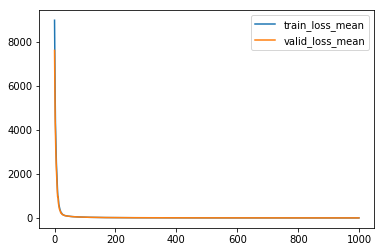

In [30]:
import matplotlib.pyplot as mplot
%matplotlib inline

mplot.plot(train_loss_mean, label='train_loss_mean')
mplot.plot(valid_loss_mean, label='valid_loss_mean')
mplot.legend()

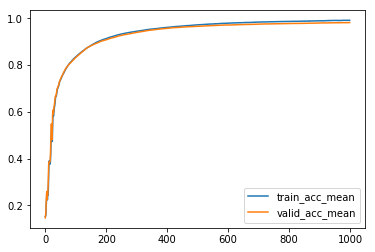

In [31]:
mplot.plot(train_acc_mean, label='train_acc_mean')
mplot.plot(valid_acc_mean, label='valid_acc_mean')
mplot.legend()

In [38]:
with tf.Session() as sess:
    sess.run(fetches=tf.global_variables_initializer())
    
    # Loading the trained and validated model
#     saver.restore(save_path=tf.train.latest_checkpoint(checkpoint_dir='checkpoints/'), sess=sess)
    saver.restore(save_path='checkpoints/cnn-fnirs-har-10subjects.ckpt', sess=sess)
    
    # Saving the test loss for every batch/minibtch
    test_loss, test_acc = [], []
    
    # applying the loaded model on test data
    for Xarr, Yarr in get_batches(X=Xtest, Y=Ytest, batch_size=Xvalid.shape[0]): 
        # X_NxWXCin, Y_NxCout
        feed_dict={X:Xarr, Y:Yarr}
        lossarr, accarr = sess.run(feed_dict=feed_dict, fetches=[loss, acc])
        test_loss.append(lossarr)
        test_acc.append(accarr)
        
    # Printing the test loss
    print('test_loss:', np.mean(test_loss), 'test acc', np.mean(test_acc))

INFO:tensorflow:Restoring parameters from checkpoints/cnn-fnirs-har-10subjects.ckpt
test_loss: 1.8538384 test acc 0.9813257
